In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [2]:
src = rasterio.open('../DEMs/clpx/bare_earth/clpx_2017_2012_dem_difference_outside_of_drifts.tif')
image = src.read(1)

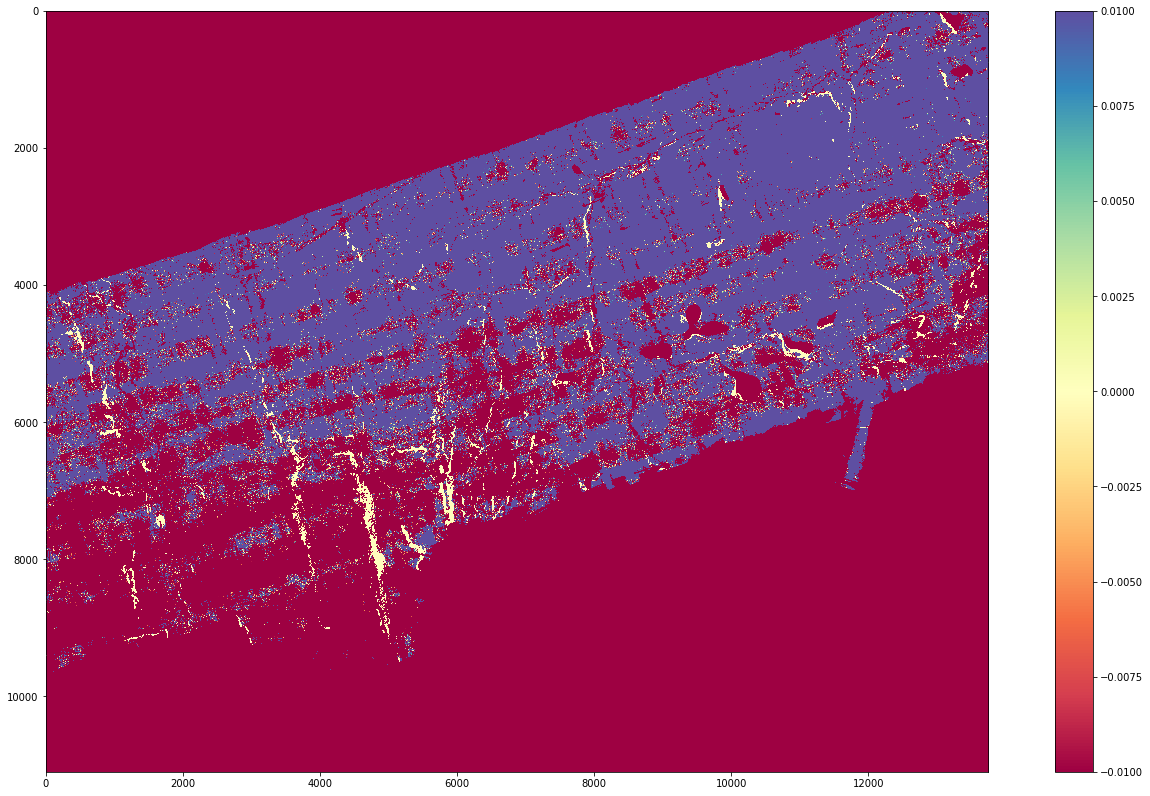

In [28]:
# Drifts are masked as 0 values
# Hard to see because of positive and negative DEM difference
plt.figure(figsize=(24,14))
plt.imshow(image, vmin=-0.01, vmax=0.01, cmap='Spectral')
plt.colorbar()

In [29]:
mask = image.copy()
mask[mask == 0] = np.nan
mask[mask == -9999] = np.nan
mask

array([[        nan,         nan,         nan, ...,  0.06488037,
        -0.01873779, -0.03167725],
       [        nan,         nan,         nan, ...,  0.06866455,
         0.01287842, -0.0612793 ],
       [        nan,         nan,         nan, ...,  0.15246582,
         0.0880127 ,  0.0602417 ],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [30]:
np.nanmean(mask)

0.036471196

In [31]:
np.nanmedian(mask)

0.03894043

In [32]:
np.nanstd(mask)

0.14245835

In [ ]:

# Blurring attempts


# src = rasterio.open('../DEMs/hv/bare_earth/hv_dem_master.tif')
# image = src.read(1)


# import skimage
# from skimage.morphology import disk
# from skimage.filters import rank

# image = skimage.img_as_float(image)
# selem = disk(20)

# percentile_result = rank.mean_percentile(image, selem=selem, p0=.1, p1=.9)
# bilateral_result = rank.mean_bilateral(image, selem=selem, s0=500, s1=500)
# normal_result = rank.mean(image, selem=selem)

# from scipy.signal import fftconvolve

# def gaussian_blur(in_array, size):
#     # expand in_array to fit edge of kernel
#     padded_array = np.pad(in_array, size, 'symmetric')
#     # build kernel
#     x, y = np.mgrid[-size:size + 1, -size:size + 1]
#     g = np.exp(-(x**2 / float(size) + y**2 / float(size)))
#     g = (g / g.sum()).astype(in_array.dtype)
#     # do the Gaussian blur
#     return fftconvolve(padded_array, g, mode='valid')

# blur = gaussian_blur(image, 4)
# plt.imshow(blur)

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
#                          sharex=True, sharey=True)
# ax = axes.ravel()

# titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
# imgs = [image, percentile_result, bilateral_result, normal_result]
# for n in range(0, len(imgs)):
#     ax[n].imshow(imgs[n], cmap=plt.cm.gray)
#     ax[n].set_title(titles[n])
#     ax[n].axis('off')

# plt.tight_layout()
# plt.show()
